# **Лабораторная работа №1** "Инструментальные средства машинного обучения"
# **Выполнил: Дякин Владимир; группа: ПИН-б-о-22-1**

## Ссылка на используемый датасет: https://archive.ics.uci.edu/dataset/19/car+evaluation

## Первичный анализ данных

### Общее описание набора данных Car Evaluation

Данный набор данных содержит информацию об оценке автомобилей по различным характеристикам. Он включает 398 экземпляров с 6 признаками, из которых 5 являются многозначными дискретными атрибутами, а 1 - целевой категориальной переменной.

### Описание признаков

1. **buying** (стоимость приобретения) - многозначный дискретный атрибут
2. **maint** (стоимость обслуживания) - многозначный дискретный атрибут 
3. **doors** (количество дверей) - многозначный дискретный атрибут
4. **persons** (вместимость) - многозначный дискретный атрибут
5. **lug_boot** (размер багажника) - многозначный дискретный атрибут
6. **class** (оценка) - целевая категориальная переменная

### Характеристики данных

- Количество элементов (Instances): 398
- Количество признаков (Features): 6
- Связанные задачи: Классификация
- Характеристики набора данных: Многомерные (Multivariate)
- Тип признаков: Многозначные дискретные (Categorical), Категориальные (Categorical)

### Распределение целевой переменной "class"

Распределение целевой переменной "class" следующее:
- unacc (неприемлемо): 1210
- acc (приемлемо): 384
- good: 69
- vgood (очень хорошо): 65

Это позволяет предположить, что в данном наборе данных большинство автомобилей имеют оценку "неприемлемо", что важно учитывать при построении моделей классификации.

Таким образом, данный набор данных Car Evaluation предоставляет основу для разработки и тестирования моделей классификации автомобилей на основе их характеристик.

## Задание

Импортируем необходимые библиотеки

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Загружаем данные из файла "car_evaluation.csv" в массив NumPy `my_data`, используя `np.genfromtxt()`. Затем выводим:
- размерность массива,
- его тип (numpy.ndarray),
- тип первой строки,
- тип пятого элемента первой строки,
- первые 10 строк массива.

In [3]:
my_data = np.genfromtxt("car_evaluation.csv", delimiter=",", dtype=None, encoding="utf-8")

print(my_data.shape)
print(type(my_data))
print(type(my_data[0]))
print(type(my_data[0][4]))
print(my_data[:10])

(1729, 7)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.str_'>
[['buying' 'maint' 'doors' 'persons' 'lug_boot' 'safety' 'class']
 ['vhigh' 'vhigh' '2' '2' 'small' 'low' 'unacc']
 ['vhigh' 'vhigh' '2' '2' 'small' 'med' 'unacc']
 ['vhigh' 'vhigh' '2' '2' 'small' 'high' 'unacc']
 ['vhigh' 'vhigh' '2' '2' 'med' 'low' 'unacc']
 ['vhigh' 'vhigh' '2' '2' 'med' 'med' 'unacc']
 ['vhigh' 'vhigh' '2' '2' 'med' 'high' 'unacc']
 ['vhigh' 'vhigh' '2' '2' 'big' 'low' 'unacc']
 ['vhigh' 'vhigh' '2' '2' 'big' 'med' 'unacc']
 ['vhigh' 'vhigh' '2' '2' 'big' 'high' 'unacc']]


Загружаем данные с помощью библиотеки pandas из "car_evaluation.csv"

In [4]:
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data = pd.read_csv('car_evaluation.csv', names=column_names, sep=',')

Преобразуем целевой признак "class" в числовые значения

In [5]:
data['class'] = data['class'].map({'unacc': 'unacc', 'acc': 'acc', 'good': 'good', 'vgood': 'vgood'})

Строим гистограмму, отображающую распределение автомобилей по классам и уровням безопасности.

<Figure size 1000x600 with 0 Axes>

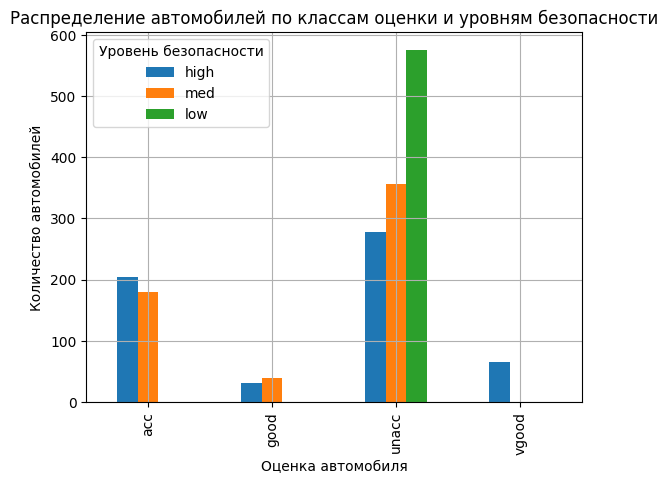

In [6]:
plt.figure(figsize=(10, 6))
data.groupby(['class', 'safety']).size().unstack(fill_value=0).plot(kind='bar')
plt.xlabel('Оценка автомобиля')
plt.ylabel('Количество автомобилей')
plt.title('Распределение автомобилей по классам оценки и уровням безопасности')
plt.legend(title='Уровень безопасности')
plt.grid()
plt.show()

Строим гистограмму, отображающую распределение автомобилей по классам и количеству дверей.

<Figure size 1000x600 with 0 Axes>

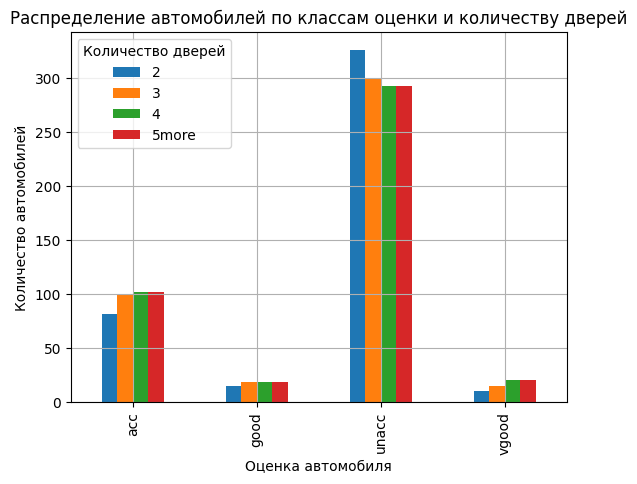

In [7]:
plt.figure(figsize=(10, 6))
data.groupby(['class', 'doors']).size().unstack(fill_value=0).plot(kind='bar')
plt.xlabel('Оценка автомобиля')
plt.ylabel('Количество автомобилей')
plt.title('Распределение автомобилей по классам оценки и количеству дверей')
plt.legend(title='Количество дверей')
plt.grid()
plt.show()

Преобразуем признак'buying' в числовые значения

In [8]:
buying_mapping = {'vhigh': 'very high', 'high': 'high', 'med': 'med', 'low': 'low'}
data['buying'] = data['buying'].map(buying_mapping)

Строим гистограмму, отображающую распределение автомобилей по классам и ценовым категориям.

<Figure size 1000x600 with 0 Axes>

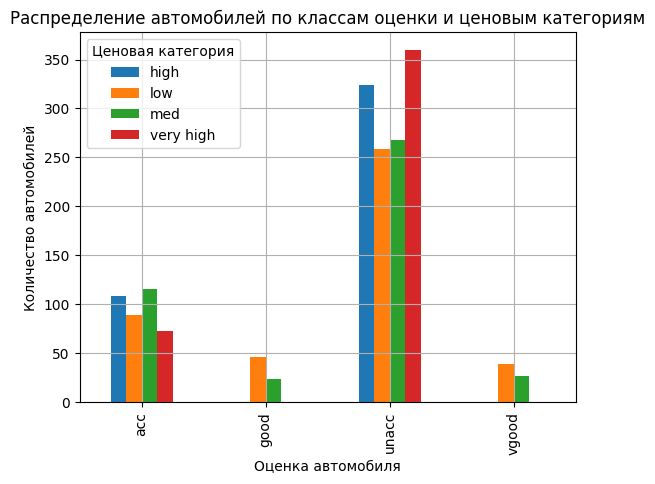

In [10]:
# Построение гистограммы
plt.figure(figsize=(10, 6))
data.groupby(['class', 'buying']).size().unstack(fill_value=0).plot(kind='bar')
plt.xlabel('Оценка автомобиля')
plt.ylabel('Количество автомобилей')
plt.title('Распределение автомобилей по классам оценки и ценовым категориям')
plt.legend(title='Ценовая категория')
plt.grid()
plt.show()

## Контрольные вопросы

### **1. Какие инструментальные средства используются для организации рабочего места специалиста Data Science?**

Для организации рабочего места специалиста Data Science используются следующие инструментальные средства:

1. **Языки программирования**: Ключевым инструментом является Python, который широко используется в области Data Science благодаря своей простоте, мощности и богатой экосистеме библиотек.
   
2. **Интегрированные среды разработки (IDE)**: Популярные IDE для Data Science включают PyCharm, Jupyter Notebook, Spyder и VS Code. Они обеспечивают удобную среду для написания, отладки и выполнения кода.

3. **Библиотеки и фреймворки**: Для обработки данных и построения моделей машинного обучения используются библиотеки такие как NumPy, Pandas, Scikit-learn, TensorFlow и PyTorch.

4. **Виртуальные среды**: Для изоляции проектов и управления зависимостями часто используются виртуальные среды, такие как virtualenv или conda.

5. **Системы управления версиями**: Для отслеживания изменений в коде и совместной работы над проектами используются системы контроля версий, например Git.

Эти инструменты помогают специалистам Data Science эффективно работать с данными, создавать и тестировать модели машинного обучения.

### **2. Какие библиотеки Python используются для работы в области машинного обучения? Дайте краткую характеристику каждой библиотеки.**

Популярных библиотеки:

1. **NumPy**: NumPy — это основная библиотека для работы с многомерными массивами и матрицами в Python. Она предоставляет мощные инструменты для работы с данными и выполнения математических операций.

2. **Pandas**: Pandas предоставляет высокоуровневые структуры данных и инструменты для анализа данных. Она упрощает чтение, запись и манипулирование данными, что делает ее идеальным инструментом для предобработки данных.

3. **Scikit-learn**: Scikit-learn — это библиотека машинного обучения с открытым исходным кодом, которая предоставляет простой и эффективный инструментарий для анализа данных и построения моделей машинного обучения.

4. **TensorFlow**: TensorFlow — это популярная библиотека глубокого обучения, разработанная компанией Google. Она предоставляет инструменты для построения и обучения нейронных сетей.

5. **PyTorch**: PyTorch — еще одна популярная библиотека глубокого обучения, которая широко используется для исследований и разработки моделей нейронных сетей.

Каждая из этих библиотек имеет свои преимущества и подходит для различных задач в области машинного обучения.

### **3. Почему при реализации систем машинного обучения широкое распространение получили библиотеки Python?**

Библиотеки Python получили широкое распространение при реализации систем машинного обучения по нескольким причинам:

1. **Простота и удобство**: Python известен своей простотой и удобством в использовании. Синтаксис Python легко читаем и понятен, что делает его привлекательным для начинающих и опытных разработчиков.

2. **Большое сообщество**: Python имеет огромное сообщество разработчиков, которые активно разрабатывают и поддерживают различные библиотеки и фреймворки для машинного обучения. Это обеспечивает доступ к обширным ресурсам и поддержке.

3. **Мощные библиотеки и фреймворки**: В Python существует множество высококачественных библиотек и фреймворков для машинного обучения, таких как NumPy, Pandas, Scikit-learn, TensorFlow и PyTorch. Эти инструменты обеспечивают широкие возможности для разработки и экспериментов с моделями машинного обучения.

4. **Интеграция с другими технологиями**: Python легко интегрируется с другими технологиями и инструментами, что делает его удобным выбором для построения систем машинного обучения, включая работу с базами данных, веб-сервисами и другими компонентами.

5. **Обширное применение**: Python широко используется не только в области машинного обучения, но и в других областях разработки программного обеспечения, что способствует его популярности и распространению среди разработчиков.

## Вывод

В ходе лабораторной работы были достигнуты следующие результаты:

- Установлена и настроена среда разработки Python для работы специалиста по анализу данных и машинному обучению.
- Изучены принципы загрузки и очистки данных, что позволило приобрести навыки по предварительной обработке данных на языке Python.
- Освоены основные библиотеки Python для работы с данными, что расширило набор инструментов специалиста по анализу данных.

Таким образом, проделанная работа позволила овладеть основными навыками и инструментами необходимыми для успешной работы в области анализа данных и машинного обучения.